# Урок 2. Масштабирование признаков. Регуляризация. Стохастический градиентный спуск.

## Масштабирование признаков

В машинном обучении при работе с линейными моделями полезной является практика _масштабирования признаков_. Многие методы машинного обучения, в том числе и линейные, наиболее эффективны в том случае, когда признаки имеют одинаковый масштаб. По сути масштабирование означает приведение признаков к какой-то единой шкале. 

Существует большое количество методов масштабирования, наиболее популярными из которых являются _нормализация_ и _стандартизация_.

Метод нормализации заколючается в приведении признаков к масштабу в диапазоне [0-1].

Для его реализации необходимо найти минимальное $min_{j} (x^{j}_{i})$ и максимальное $max_{j} (x^{j}_{i})$ значение признака на обучающей выборке. При этом отмасштабированное значение признака будет находиться по формуле

$$x^{j}_{i} = \frac{x^{j}_{i} - min_{j} (x^{j}_{i})}{max_{j} (x^{j}_{i})-min_{j} (x^{j}_{i})}.$$

После преобразования значений признаков минимальное значение превратится в 0, а максимальное - в 1.

Стандартизация заключается в получении своего рода значения сдвига каждого признака от среднего. Для ее реализации необходимо вычислить среднее значение признака 

$$\mu_{j} = \frac{1}{l}\sum^{l}_{i=1}x^{j}_{i}$$

и стандартное отклонение, которое находится путем суммирования квадратов отклонения значений признака на объектах выборки от среднего $\mu_{j}$ и делением на число объектов выборки с последующим извлечением корня:

$$\sigma_{j} = \sqrt{\frac{1}{l}\sum^{l}_{i=1}(x^{j}_{i}-\mu_{j})^{2}}$$

Чтобы отмасштабировать признак, каждое его значение преобразуется по формуле

$$x^{j}_{i}=\frac{x^{j}_{i} - \mu_{j}}{\sigma_{j}}.$$

Масштабирование является важным этапом подготовки данных перед применением методов машинного обучения. 

Важным и последним свойством масштабирования является факт, что после масштабирования признаков в линейных моделях веса при них могут интерпретироваться как мера значимости этих признаков.

Существуют различные ситуации, когда целесообразно применять тот или иной метод масштабирования. Нормализовать полезно признаки, опирающиеся на величину значений - такие как расстояние. Стандартизировать полезно признаки для модели, которая опирается на распределение. В общем случае, когда выбор метода неочевиден, полезной практикой считается создавать масштабированные копии набора данных, с которыми работает специалист, и сравнивать друг с другом полученные после применения модели результаты для выявления оптимального метода масштабирования для имеющейся ситуации.

## Стохастический градиентный спуск

Вспомним метод градиентного спуска, рассмотренный ранее.

На каждой итерации приближение получается вычитанием из предыдущего вектора градиента, умноженного на некоторый шаг:


$$w^{k} = w^{k-1} - \eta_{k}\nabla Q(w^{k-1}, X).$$

При этом выражение градиента в матричной форме выглядит так:

$$\nabla_{w}Q(w,X) = \frac{2}{l}X^{T}(Xw-y).$$

Если расписать $j$-ю компонетну этого градиента, то получим

$$\frac{\partial Q}{\partial w_{j}} = \frac{2}{l}\sum^{l}_{i=1}x^{j}_{i}(\left \langle w,x_{i} \right \rangle - y_{i}),$$

то есть суммирование по всем $l$ объектам обучающей выборки. Здесь выражение под суммой показывает, как нужно изменить $j$-й вес, чтобы как можно сильнее улучшить качество __на объекте $x_{i}$__, а вся сумма показывает, как нужно изменить вес, чтобы улучшить качество на __всей выборке__.

В этой формуле отражен один из главных недостатков градиентного спуска: если выборка большая по объему, то даже один шаг градиентного спуска будет занимать много вычислительных ресурсов и времени.

Стремление к оптимизации процесса привело к появлению _стохастического градиентного спуска_ (Stochastic gradient descent, SGD). Идея его основана на том, что на одной итерации мы вычитаем не вектор градиента, вычисленный по всей выборке, а вместо этого случайно выбираем один объект из обучающей выборки $x_{i}$ и вычисляем градиент только на этом объекте, то есть градиент только одного слагаемого в функционале ошибки и вычитаем именно этот градиент из текущего приближения вектора весов:

$$w^{k} = w^{k-1} - \eta_{k}\nabla Q(w^{k-1}, \{x_{i}\}),$$

то есть $\nabla Q(w^{k-1}, X)$ заменяется на $\nabla Q(w^{k-1}, \{x_{i}\})$.

Если в случае градиентного спуска мы стараемся на каждой итерации уменьшить ошибку на всей выборке, и по мере увеличения числа итераций ошибка падает монотонно, то в случае стохастического градиентного спуска мы уменьшаем на каждой итерации ошибку только на одном объекте, но при этом есть вероятность увеличить ее на другом объекте, поэтому график изменения ошибки может получаться немонотонным, и даже иметь пики (см. пример по ссылке [1] из списка литературы). То есть на какой-то итерации мы можем даже увеличить ошибку, но при этом в целом по ходу метода ошибка снижается, и рано или поздно мы выходим на нормальный уровень.

Реализуем стохастический градиентный спуск своими руками.

In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# сгенерируем набор данных
data, target, coef = datasets.make_regression(n_samples=10000, n_features = 2, n_informative = 2, n_targets = 1, 
                                              noise = 5, coef = True, random_state = 2)
    



In [3]:
print(data)

[[-2.75161769e-01  3.88051923e-01]
 [-7.39931870e-01  6.41540019e-01]
 [ 1.73259956e+00  1.38746003e+00]
 ...
 [ 9.95690738e-02  1.14050425e+00]
 [ 5.72821025e-01 -1.62061166e-03]
 [-8.10975181e-01 -7.90286210e-01]]


In [4]:
print(target)

[-14.05893282 -38.97475249  86.53592019 ...  10.32003217  29.28329989
 -35.99295458]


In [5]:
print(coef)

[47.46102593  1.66486956]


Отмасштабируем получившиеся признаки методом стандартизации.

In [6]:
# Получим средние значения и стандартное отклонение по столбцам
 
means = np.mean(data, axis=0)
stds = np.std(data, axis=0)
# параметр axis указывается для вычисления значений по столбцам, а не по всему массиву
#(см. документацию в разделе источников)
 
# вычтем каждое значение признака из среднего и поделим на стандартное отклонение
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        data[i][j] = (data[i][j] - means[j])/stds[j]

In [7]:
print(data)
print(means)

[[-2.77754356e-01  3.85504659e-01]
 [-7.44773351e-01  6.35711699e-01]
 [ 1.73972197e+00  1.37197680e+00]
 ...
 [ 9.87897050e-02  1.12821753e+00]
 [ 5.74331592e-01  8.75901031e-04]
 [-8.16160421e-01 -7.77581502e-01]]
[ 0.00125508 -0.002508  ]


In [8]:
# реализуем функцию, определяющую среднеквадратичную ошибку
def mserror(X, w, y_pred):
    y = X.dot(w)
    return (sum((y - y_pred)**2)) / len(y)

Подготовка данных и средств проверки закончена. Далее реализуем сам стохастический градиентный спуск.

In [9]:
# инициализируем начальный вектор весов
w = np.zeros(2)
 
# список векторов весов после каждой итерации
w_list = [w.copy()]
 
# список значений ошибок после каждой итерации
errors = []
 
# шаг градиентного спуска
eta = 0.5
 
# максимальное число итераций
max_iter = 1000#1e5
 
# критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist = 1e-8#1e-8
 
# зададим начальную разницу весов большим числом
weight_dist = np.inf
 
# счетчик итераций
iter_num = 0
 
#np.random.seed(13)
 
# ход градиентного спуска
while weight_dist > min_weight_dist and iter_num < max_iter:
    
    # генерируем случайный индекс объекта выборки
    train_ind = np.random.randint(data.shape[0])
    print(f"случайный индекс объекта выборки {train_ind}")
    print(f"data[train_ind] {data[train_ind]}")
    
    new_w = w - 2 * eta * np.dot(data[train_ind].T, (np.dot(data[train_ind], w) - target[train_ind])) / target.shape[0]
    print(f"new_w {new_w}")
    
    weight_dist = np.linalg.norm(new_w - w, ord=2)
    print(f"weight_dist {weight_dist}")
    
    w_list.append(new_w.copy())
    errors.append(mserror(data, new_w, target))
    
    iter_num += 1
    w = new_w
    
w_list = np.array(w_list)
 
print(f'В случае использования стохастического градиентного спуска функционал ошибки составляет {round(errors[-1], 4)}')

случайный индекс объекта выборки 1249
data[train_ind] [-1.20035048 -2.61963322]
new_w [0.00693423 0.01513319]
weight_dist 0.016646227203446346
случайный индекс объекта выборки 4705
data[train_ind] [ 0.28733677 -0.32392016]
new_w [0.00733823 0.01467774]
weight_dist 0.000608810478743314
случайный индекс объекта выборки 8178
data[train_ind] [1.33403029 0.76017444]
new_w [0.01713376 0.02025956]
weight_dist 0.011274259654955439
случайный индекс объекта выборки 5473
data[train_ind] [-0.47503268 -1.20523444]
new_w [0.01807297 0.02264249]
weight_dist 0.0025613488865326916
случайный индекс объекта выборки 525
data[train_ind] [1.42759395 0.16044005]
new_w [0.02731319 0.02368095]
weight_dist 0.009298388683018573
случайный индекс объекта выборки 7509
data[train_ind] [-0.20921829 -3.49512344]
new_w [0.02754423 0.02754064]
weight_dist 0.0038665952491550967
случайный индекс объекта выборки 1779
data[train_ind] [1.75570245 1.59064707]
new_w [0.04194331 0.04058605]
weight_dist 0.019429781889855828
случ

случайный индекс объекта выборки 4987
data[train_ind] [-2.4704808  -1.89729068]
new_w [0.3104997 0.0188684]
weight_dist 0.034676098122727025
случайный индекс объекта выборки 478
data[train_ind] [-0.58183331 -2.01406221]
new_w [0.31236532 0.02532642]
weight_dist 0.006722095841797689
случайный индекс объекта выборки 1432
data[train_ind] [ 0.00329294 -0.30495991]
new_w [0.31236692 0.02517895]
weight_dist 0.00014747308841827798
случайный индекс объекта выборки 7939
data[train_ind] [-0.20798423  0.3941064 ]
new_w [0.31263955 0.02466234]
weight_dist 0.0005841354855726182
случайный индекс объекта выборки 549
data[train_ind] [0.83082963 2.47977353]
new_w [0.31651928 0.03624215]
weight_dist 0.012212462985905578
случайный индекс объекта выборки 3398
data[train_ind] [-1.02382562 -1.14708647]
new_w [0.321237   0.04152784]
weight_dist 0.007084872536197492
случайный индекс объекта выборки 4336
data[train_ind] [-0.27199903 -2.27517529]
new_w [0.32163133 0.04482631]
weight_dist 0.0033219557880855757
с

случайный индекс объекта выборки 6395
data[train_ind] [ 0.7370461  -0.95575893]
new_w [0.64543006 0.07409289]
weight_dist 0.003513789421447396
случайный индекс объекта выборки 4354
data[train_ind] [ 1.40323151 -0.7176204 ]
new_w [0.65502082 0.06918813]
weight_dist 0.010772155398664536
случайный индекс объекта выборки 4773
data[train_ind] [-0.28029072 -0.17678448]
new_w [0.65548798 0.06948277]
weight_dist 0.0005523126586418198
случайный индекс объекта выборки 9896
data[train_ind] [-1.99649499 -1.9176696 ]
new_w [0.67426076 0.08751437]
weight_dist 0.026029903695724704
случайный индекс объекта выборки 2707
data[train_ind] [-0.79331406 -1.69899289]
new_w [0.67743411 0.09431055]
weight_dist 0.007500549727683058
случайный индекс объекта выборки 2950
data[train_ind] [0.85217057 0.83875417]
new_w [0.68114334 0.09796138]
weight_dist 0.005204513441685769
случайный индекс объекта выборки 617
data[train_ind] [-1.00774557 -0.30816789]
new_w [0.68657215 0.09962151]
weight_dist 0.005676963736797262
с

случайный индекс объекта выборки 8664
data[train_ind] [1.10292478 0.46290011]
new_w [0.95705323 0.10633741]
weight_dist 0.006541322719222443
случайный индекс объекта выборки 3510
data[train_ind] [-1.24728611  2.34912325]
new_w [0.9637845  0.09365982]
weight_dist 0.014353798448435267
случайный индекс объекта выборки 7624
data[train_ind] [-0.26165619 -0.22955451]
new_w [0.96408793 0.09392602]
weight_dist 0.0004036518084617554
случайный индекс объекта выборки 5515
data[train_ind] [-0.93810661  1.70513862]
new_w [0.96855021 0.08581522]
weight_dist 0.00925727094554288
случайный индекс объекта выборки 1338
data[train_ind] [0.08392378 1.26830517]
new_w [0.96855523 0.08589106]
weight_dist 7.600936757109645e-05
случайный индекс объекта выборки 6772
data[train_ind] [1.18303722 0.72209791]
new_w [0.97497591 0.08981009]
weight_dist 0.0075222305699155405
случайный индекс объекта выборки 3182
data[train_ind] [ 1.04286602 -0.02039416]
new_w [0.98020678 0.0897078 ]
weight_dist 0.005231873549222871
слу

случайный индекс объекта выборки 6391
data[train_ind] [ 1.50639802 -0.90602237]
new_w [1.26880881 0.06988226]
weight_dist 0.011331866526531608
случайный индекс объекта выборки 1258
data[train_ind] [ 1.38975036 -0.98181708]
new_w [1.27754619 0.06370956]
weight_dist 0.010697843540167094
случайный индекс объекта выборки 2459
data[train_ind] [-0.37567355  0.41648415]
new_w [1.27834437 0.06282466]
weight_dist 0.0011917000845457321
случайный индекс объекта выборки 2785
data[train_ind] [-0.42756485  0.23079857]
new_w [1.27901858 0.06246073]
weight_dist 0.0007661589932800301
случайный индекс объекта выборки 2795
data[train_ind] [ 0.35592304 -2.23321206]
new_w [1.27961728 0.0587042 ]
weight_dist 0.0038039371901606644
случайный индекс объекта выборки 8310
data[train_ind] [1.89587573 0.91387959]
new_w [1.29667906 0.06692859]
weight_dist 0.018940560000730786
случайный индекс объекта выборки 2178
data[train_ind] [ 0.03845712 -1.48181751]
new_w [1.29668785 0.06659004]
weight_dist 0.00033866511406547

случайный индекс объекта выборки 4793
data[train_ind] [ 0.10004381 -0.11196134]
new_w [1.70083126 0.06009835]
weight_dist 3.892694941868794e-05
случайный индекс объекта выборки 6475
data[train_ind] [-0.77024472  1.37275122]
new_w [1.70353669 0.05527668]
weight_dist 0.005528824355908975
случайный индекс объекта выборки 8053
data[train_ind] [-0.93181454  0.19049629]
new_w [1.70737546 0.05449189]
weight_dist 0.003918167558351378
случайный индекс объекта выборки 4936
data[train_ind] [0.49288998 0.72210796]
new_w [1.70852903 0.05618194]
weight_dist 0.0020462136210907095
случайный индекс объекта выборки 9416
data[train_ind] [-0.88139575  0.19619808]
new_w [1.71194577 0.05542138]
weight_dist 0.00350036713990124
случайный индекс объекта выборки 93
data[train_ind] [-1.15781089  0.42980646]
new_w [1.71799268 0.05317662]
weight_dist 0.006450120608618318
случайный индекс объекта выборки 1068
data[train_ind] [0.64306331 0.93654318]
new_w [1.71954372 0.05543552]
weight_dist 0.002740136057204994
случ

случайный индекс объекта выборки 3707
data[train_ind] [-0.09357316 -1.25655365]
new_w [1.92992218 0.1229177 ]
weight_dist 0.0001552996200642084
случайный индекс объекта выборки 8020
data[train_ind] [-0.61840585  0.12304724]
new_w [1.93164427 0.12257505]
weight_dist 0.0017558423689413595
случайный индекс объекта выборки 4789
data[train_ind] [ 0.79036079 -0.952876  ]
new_w [1.93416344 0.11953788]
weight_dist 0.003945973057624415
случайный индекс объекта выборки 4526
data[train_ind] [ 0.06868297 -0.62032078]
new_w [1.93415722 0.11959408]
weight_dist 5.65508569238315e-05
случайный индекс объекта выборки 4274
data[train_ind] [-0.26314889  0.88457339]
new_w [1.93413521 0.11966808]
weight_dist 7.720176974486627e-05
случайный индекс объекта выборки 1615
data[train_ind] [ 0.77348129 -0.30697473]
new_w [1.93695918 0.11854732]
weight_dist 0.003038243797908892
случайный индекс объекта выборки 5579
data[train_ind] [0.06368564 1.31910386]
new_w [1.93694651 0.11828486]
weight_dist 0.00026276645376047

случайный индекс объекта выборки 4134
data[train_ind] [-1.62395765  0.04216242]
new_w [2.20572451 0.11386682]
weight_dist 0.011130505294435622
случайный индекс объекта выборки 1825
data[train_ind] [-0.56891594 -0.13679138]
new_w [2.20722975 0.11422875]
weight_dist 0.0015481402974551234
случайный индекс объекта выборки 3346
data[train_ind] [-0.86974514  0.68378396]
new_w [2.21087689 0.11136141]
weight_dist 0.004639318010072429
случайный индекс объекта выборки 423
data[train_ind] [ 0.97680453 -1.45769737]
new_w [2.21522262 0.10487622]
weight_dist 0.007806602506708343
случайный индекс объекта выборки 7465
data[train_ind] [0.71505126 0.77756795]
new_w [2.21756738 0.10742598]
weight_dist 0.003463981603393829
случайный индекс объекта выборки 9125
data[train_ind] [-0.82266076 -1.14468849]
new_w [2.22054847 0.11157401]
weight_dist 0.005108133228408156
случайный индекс объекта выборки 2482
data[train_ind] [0.31193588 1.39419464]
new_w [2.22119557 0.11446625]
weight_dist 0.0029637512600791623
сл

data[train_ind] [ 3.05918363 -0.51684424]
new_w [2.45197522 0.08619318]
weight_dist 0.04305518777147035
случайный индекс объекта выборки 937
data[train_ind] [ 0.41514445 -1.20276168]
new_w [2.4526589  0.08421241]
weight_dist 0.0020954400395093845
случайный индекс объекта выборки 405
data[train_ind] [-1.1890864   0.89998905]
new_w [2.45913539 0.07931052]
weight_dist 0.008122400806427427
случайный индекс объекта выборки 7288
data[train_ind] [0.45919851 0.64256448]
new_w [2.45971327 0.08011916]
weight_dist 0.0009939017426070361
случайный индекс объекта выборки 85
data[train_ind] [0.08866542 0.16325459]
new_w [2.45977414 0.08023123]
weight_dist 0.00012753329357756874
случайный индекс объекта выборки 9349
data[train_ind] [ 1.49834133 -0.76713898]
new_w [2.4699746  0.07500867]
weight_dist 0.01145968946434043
случайный индекс объекта выборки 7508
data[train_ind] [-2.92859291  0.10143813]
new_w [2.5068588  0.07373111]
weight_dist 0.03690631963254487
случайный индекс объекта выборки 4126
data[t

случайный индекс объекта выборки 6715
data[train_ind] [-0.23223544 -0.428165  ]
new_w [2.84663099 0.06768584]
weight_dist 0.000886719440779447
случайный индекс объекта выборки 6027
data[train_ind] [1.83942416 0.51384201]
new_w [2.8612094  0.07175831]
weight_dist 0.015136552418522149
случайный индекс объекта выборки 4687
data[train_ind] [0.56649608 1.23759622]
new_w [2.86282058 0.07527816]
weight_dist 0.0038710813799364267
случайный индекс объекта выборки 4
data[train_ind] [ 1.1631545  -0.31516582]
new_w [2.86823565 0.07381091]
weight_dist 0.005610328472924713
случайный индекс объекта выборки 7084
data[train_ind] [1.07196794 2.39570661]
new_w [2.87452272 0.0878617 ]
weight_dist 0.01539324452491013
случайный индекс объекта выборки 7791
data[train_ind] [-1.60858571 -2.29853209]
new_w [2.88635791 0.10477318]
weight_dist 0.02064146029268052
случайный индекс объекта выборки 818
data[train_ind] [-1.68694381  0.98312156]
new_w [2.89982054 0.09692739]
weight_dist 0.015581995559731363
случайный 

случайный индекс объекта выборки 231
data[train_ind] [0.08184638 0.8093936 ]
new_w [3.28538092 0.12973574]
weight_dist 0.0006870269671469184
случайный индекс объекта выборки 8740
data[train_ind] [-0.71288229  0.51683992]
new_w [3.28697927 0.12857694]
weight_dist 0.001974221540880252
случайный индекс объекта выборки 4730
data[train_ind] [0.12334839 0.77384581]
new_w [3.28712278 0.12947731]
weight_dist 0.0009117377932290874
случайный индекс объекта выборки 3846
data[train_ind] [-0.38102949 -0.08656464]
new_w [3.28740128 0.12954058]
weight_dist 0.0002855926222120677
случайный индекс объекта выборки 5090
data[train_ind] [0.29995583 0.26445222]
new_w [3.28753221 0.12965601]
weight_dist 0.00017454909181022332
случайный индекс объекта выборки 4736
data[train_ind] [-0.84306947 -1.23859258]
new_w [3.29001728 0.13330695]
weight_dist 0.004416435323397061
случайный индекс объекта выборки 6533
data[train_ind] [ 0.63500088 -0.25699089]
new_w [3.29208045 0.13247196]
weight_dist 0.0022257312928140325


случайный индекс объекта выборки 5548
data[train_ind] [-0.74845251 -1.76639285]
new_w [3.49465573 0.18345383]
weight_dist 0.006726266815191413
случайный индекс объекта выборки 461
data[train_ind] [ 0.29077588 -0.46713032]
new_w [3.49519002 0.18259551]
weight_dist 0.0010110312019385504
случайный индекс объекта выборки 4128
data[train_ind] [-0.84598401  1.0727548 ]
new_w [3.49872043 0.17811875]
weight_dist 0.005701323700648528
случайный индекс объекта выборки 3149
data[train_ind] [0.15859712 0.05898545]
new_w [3.4987386  0.17812551]
weight_dist 1.938750772274369e-05
случайный индекс объекта выборки 6440
data[train_ind] [0.71403534 0.18747664]
new_w [3.50110341 0.17874641]
weight_dist 0.002444963191212704
случайный индекс объекта выборки 3196
data[train_ind] [-0.47709926  1.28385907]
new_w [3.50223385 0.17570443]
weight_dist 0.0032452366386366187
случайный индекс объекта выборки 1132
data[train_ind] [ 1.82873929 -0.46611846]
new_w [3.5168346  0.17198291]
weight_dist 0.01506757386391443
сл

случайный индекс объекта выборки 7848
data[train_ind] [0.72155418 1.7313016 ]
new_w [3.77197    0.14251053]
weight_dist 0.006152443208494427
случайный индекс объекта выборки 5344
data[train_ind] [-0.1366743  -1.50711179]
new_w [3.77208953 0.14382852]
weight_dist 0.0013233945116970405
случайный индекс объекта выборки 6622
data[train_ind] [ 0.22920223 -1.09311666]
new_w [3.77206892 0.14392681]
weight_dist 0.00010043454968784408
случайный индекс объекта выборки 8443
data[train_ind] [-0.80543611 -0.68354098]
new_w [3.77404524 0.14560403]
weight_dist 0.0025920866570517138
случайный индекс объекта выборки 6516
data[train_ind] [-2.57389276 -0.36546583]
new_w [3.80397568 0.14985385]
weight_dist 0.030230656977699423
случайный индекс объекта выборки 6667
data[train_ind] [ 1.69812693 -0.1439714 ]
new_w [3.81697519 0.14875171]
weight_dist 0.01304614294741513
случайный индекс объекта выборки 2023
data[train_ind] [-1.13469452  1.31196356]
new_w [3.82169773 0.14329139]
weight_dist 0.00721925030299313

случайный индекс объекта выборки 8396
data[train_ind] [-1.75256734 -0.84889127]
new_w [4.05023075 0.15461065]
weight_dist 0.014362513370403548
случайный индекс объекта выборки 2180
data[train_ind] [-0.75194477 -0.50399274]
new_w [4.05257609 0.15618262]
weight_dist 0.002823420982597069
случайный индекс объекта выборки 398
data[train_ind] [-1.81620083  1.90604951]
new_w [4.06844409 0.13952962]
weight_dist 0.023002514537858825
случайный индекс объекта выборки 5009
data[train_ind] [-0.42973002  0.18737123]
new_w [4.06907911 0.13925274]
weight_dist 0.0006927584247589183
случайный индекс объекта выборки 8718
data[train_ind] [ 1.25909878 -0.6646826 ]
new_w [4.07648913 0.13534097]
weight_dist 0.00837915695858936
случайный индекс объекта выборки 7408
data[train_ind] [0.47976151 0.00755172]
new_w [4.07741513 0.13535554]
weight_dist 0.00092611836077746
случайный индекс объекта выборки 9448
data[train_ind] [ 0.70758977 -0.55683353]
new_w [4.07928531 0.13388381]
weight_dist 0.002379825510593184
слу

случайный индекс объекта выборки 9754
data[train_ind] [-1.19853369  0.35628054]
new_w [4.47160058 0.14416316]
weight_dist 0.00679234410076744
случайный индекс объекта выборки 4959
data[train_ind] [ 0.91998406 -1.0877911 ]
new_w [4.4744769 0.1407622]
weight_dist 0.004454187143247056
В случае использования стохастического градиентного спуска функционал ошибки составляет 1859.1457


Для стохастического градиентного спуска мы увеличили максимальное число итераций (max_iter) до 10000, что естественно, так как из-за специфики метода для достижения сходимости нужно большее количество шагов.

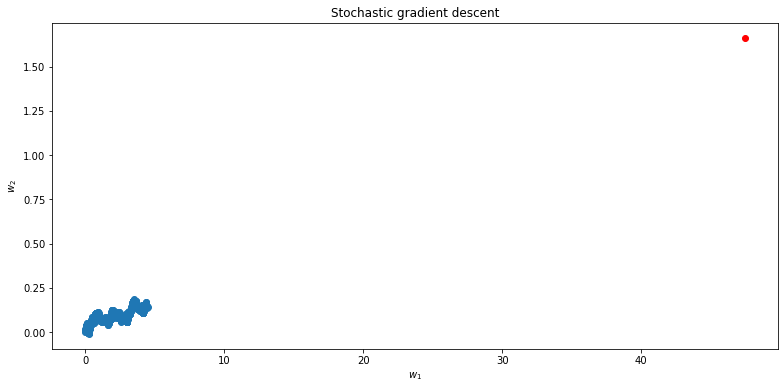

In [10]:
# Визуализируем изменение весов (красной точкой обозначены истинные веса, сгенерированные вначале)
plt.figure(figsize=(13, 6))
plt.title('Stochastic gradient descent')
plt.xlabel(r'$w_1$')
plt.ylabel(r'$w_2$')

plt.scatter(w_list[:, 0], w_list[:, 1])
plt.scatter(coef[0], coef[1], c='r')
# plt.plot(w_list[:, 0], w_list[:, 1])

plt.show()

Text(0, 0.5, 'MSE')

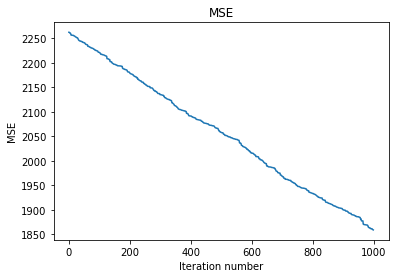

In [11]:
# Визуализируем изменение функционала ошибки
plt.plot(range(len(errors)), errors)
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')

Как и в случае градиентного спуска, вектор весов приближается к истинному. При этом падает и ошибка. Сравнить скорость ее падения для двух методов вам предстоит в домашнем задании.

Добиться лучшей скорости сходимости в методе стохастического градиентного спуска можно варьируя величину шага или используя методы, подбирающие ее адаптивно.

Среди преимуществ SGD можно выделить гораздо более быстрое вычисление одного шага по сравнению с обычным градиентным спуском и отсутствие необходимости хранить всю выборку в памяти при работе метода, что в свою очередь позволяет работать с очень большими выборками, которые невозможно поместить в память.

## Переобучение и методы борьбы с ним

Чтобы понять смысл переобучения и недообучения, начнем с примера. Допустим, у нас есть исходная известная зависимость 3-го порядка:

$$f(x) = 0.6 - 13.2x - 5.3 x^{2} - 4.17x^{3}.$$

Реализуем ее в виде python-функции и построим график.

In [12]:
def f(x):
    return 0.6 - 13.2 * x - 5.3 * x ** 2 - 4.17 * x ** 3

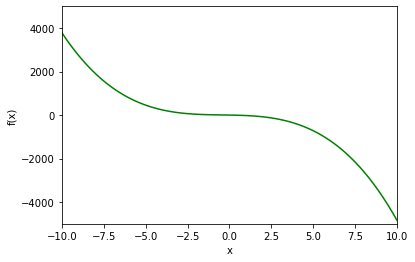

In [13]:
dots = np.linspace(-10, 10, 100)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(-5000, 5000)
plt.xlim(-10,10)

plt.plot(dots, f(dots), color='g')

Теперь сгенерируем датасет из десяти случайных точек, подчиняющихся этой зависимости, с добавлением шума и нанесем на график.

In [14]:
np.random.seed(16)
x_data = np.random.uniform(-10, 10, 10)
f_data = [f(i) for i in x_data] + np.random.uniform(-1000, 1000, 10)

In [15]:
x_data

array([-5.53417842,  0.46326683,  1.01402913, -9.087961  , -2.78542329,
       -5.53838117,  3.77452324, -6.7253715 , -8.59350266,  8.8202172 ])

In [16]:
np.reshape(x_data, (5, -1))

array([[-5.53417842,  0.46326683],
       [ 1.01402913, -9.087961  ],
       [-2.78542329, -5.53838117],
       [ 3.77452324, -6.7253715 ],
       [-8.59350266,  8.8202172 ]])

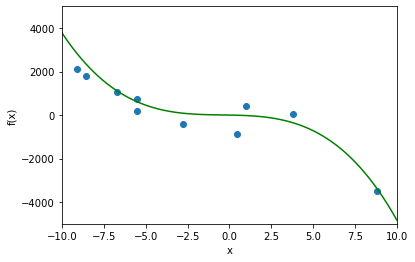

In [17]:
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(-5000, 5000)
plt.xlim(-10,10)

plt.plot(dots, f(dots), color='g')
plt.scatter(x_data, f_data)

Теперь попробуем создать модель, способную восстановить исходную зависимость. Самым примитивным так называемый __константный алгоритм__, то есть модель вида 

$$a(x) = w_{0}.$$

Зависимость такой модели от признаков будет иметь вид горизонтальной прямой, что, очевидно, не обобщает нашу зависимость в должном виде (см. график ниже).

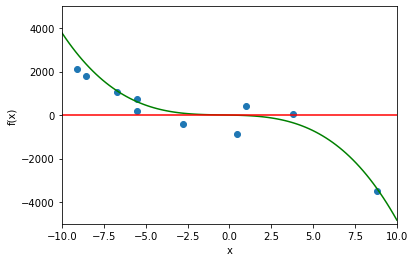

In [18]:
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(-5000, 5000)
plt.xlim(-10,10)

plt.plot(dots, f(dots), color='g')
plt.scatter(x_data, f_data)
plt.plot(dots, [dots.mean()]*len(dots), color='r')

Далее усложним семейство алгоритмов, применив линейную регрессию, которая в случае одного признака будет иметь вид 

$$a(x) = w_{0} + w_{1}x.$$

Обучим соответствующую модель, применив для этого методы python "из коробки" для работы с линейной регрессией.

In [19]:
from sklearn import linear_model

# создадим модель
linear_regressor = linear_model.LinearRegression()

# обучим ее
linear_regressor.fit(np.reshape(x_data, (-1, 1)), f_data)

LinearRegression()

In [20]:
# выведем полученный вес при признаке и свободный коэффициент
print(linear_regressor.coef_[0], linear_regressor.intercept_)

-237.82400777158767 -411.9249993231066


Нанесем полученную после обучения модель на график

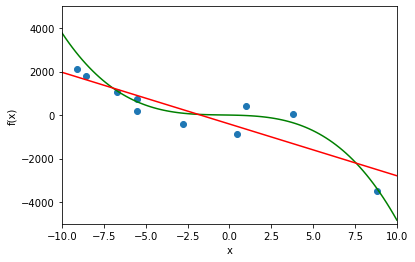

In [21]:
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(-5000, 5000)
plt.xlim(-10,10)

plt.plot(dots, f(dots), color='g')
plt.scatter(x_data, f_data)
plt.plot(dots, linear_regressor.predict(np.reshape(dots, (-1, 1))), color='r')

Мы обучили линейную модель, и видимо, что она, как и константная, плохо восстанавливает исходную зависимость. В данном случае можно говорить о __недообучении__. Хороший алгоритм не был построен, поскольку с помощью выбранного семейства алгоритмов невозможно восстановить исходную закономерность.

Усложним используемое семейство алгоритмов до кубической зависимости 

$$a(x) = w_{0} + w_{1}x + w_{2}x^{2} + w_{3}x^{3}.$$

Сделаем это путем искусственной генерации новой матрицы признаков, состоящей из исходных $x$, возведенных в степени до 3, используя `sklearn.preprocessing.PolynomialFeatures`. 

In [22]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# создадим новую кубическую модель
third_degree_regressor = make_pipeline(PolynomialFeatures(degree=3), linear_model.LinearRegression())

# обучим ее
third_degree_regressor.fit(np.reshape(x_data, (-1, 1)), f_data)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('linearregression', LinearRegression())])

In [23]:
# выведем полученные веса при признаках и свободный коэффициент
print(third_degree_regressor.named_steps.linearregression.coef_)
print(third_degree_regressor.named_steps.linearregression.intercept_)


[ 0.         21.09882775 -7.90436131 -4.26313079]
-55.95265093706212


Нанесем полученную в итоге зависимость на график.

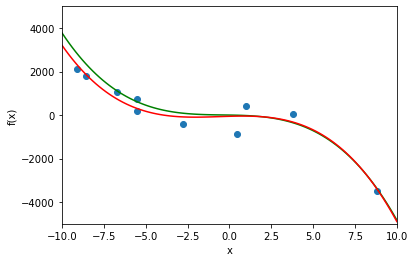

In [24]:
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(-5000, 5000)
plt.xlim(-10,10)

plt.plot(dots, f(dots), color='g')
plt.scatter(x_data, f_data)
plt.plot(dots, third_degree_regressor.predict(np.reshape(dots, (-1, 1))), color='r')

Полученный алгоритм достаточно хорошо описывает данные, но не идеально. И в реальных условиях может возникнуть вопрос, можно ли добиться лучшего совпадения увеличением сложности алгоритма.

Проиллюстрируем, что происходит в случае использования многочлена 8-й степени.

In [25]:
# создадим модель 8-й степени
eighth_degree_regressor = make_pipeline(PolynomialFeatures(degree=8), linear_model.LinearRegression())

# обучим ее
eighth_degree_regressor.fit(np.reshape(x_data, (-1, 1)), f_data)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=8)),
                ('linearregression', LinearRegression())])

Покажем получившийся график зависимости.

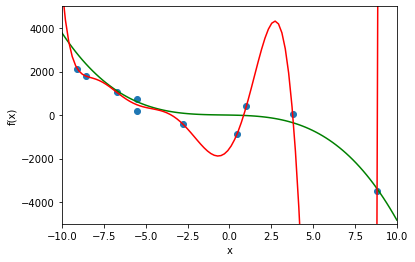

In [26]:
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(-5000, 5000)
plt.xlim(-10,10)

plt.plot(dots, f(dots), color='g')
plt.scatter(x_data, f_data)
plt.plot(dots, eighth_degree_regressor.predict(np.reshape(dots, (-1, 1))), color='r')

Видно, что новая модель лучше описывает имеющиеся в обучающей выборке данные и дает фактически идеальные ответы на них, но про этом в целом зависимость сильно отличается от истинной. Поэтому если мы попробуем применить эту модель на новых данных, ответы будут расходиться с правильными. Такое явление и называется __переобучением__. Алгоритм слишком сильно подогнан под обучающую выборку, и за счет этого будет давать неадекватные ответы на новых точках.

Таким образом, недообучение несет за собой плохое качество на обучении и на новых данных, а переобучение - хорошее качество на обучении и плохое на новых данных.

Понятно, как бороться с недообучением - усложнять семейство алгоритмов. Возникает вопрос, как выявить переобучение и его избежать. В случае переобучения, как было сказано ранее, данные из обучающей выборки алгоритмом будут описываться хорошо, а новые данные - плохо, поэтому используя только обучающую выборку, невозможно заключить, хорошо обучен алгоритм или переобучен, так как оба они будут хорошо описывать известные данные.

Есть несколько методов оценки качества алгоритма и выявления переобучения:

1. Не использовать всю выборку для обучения, а откладывать часть данных для проверки полученного алгоритма. Это называется _отложенной выборкой_. Данные делятся на обучающую и тестовую выборку в соотношении, например, 0.7 к 0.3, и затем на первой части алгоритм обучается, а на второй проверяется. Размер отложенной выборки в данном случае нужно подбирать с осторожностью, так как слишком маленькая тестовая выборка не будет обеспечивать должной точности оценки качества обучения, а слишком маленькия обучающая выборка приведет к снижению качества обучения, так как будет малорепрезентативна. Таким образом, главный минус этого метода - сильная зависимость результата от того, как мы выбираем отложенную выборку. Например, в пространстве объектов могут быть какие-то особые, отличающиеся от остальных по какому-то свойству объекты, и может так произойти, что после разбиения они не попадут в обучающую выборку, алгоритм на них не обучится, и качество обучения после проверки на этих объектах, попавших в тестовую выборку, будет плохим. Один из путей решения этой проблемы - многократное случайное разбиение выборки на тестовую и обучающую и использование в качестве оценки качества среднего значения ошибки полученной после каждого разбиения. Но и этот метод не гарантирует, что каждый объект побывает в обучающей выборке, так как разбиения случайные.


2. _Кросс-валидация_ (усложненная версия метода отложенной выборки). Этот метод как раз вытекает из проблемы, описанной выше. Он является более системным подходом. В этом случае выборка разбивается на $k$ блоков, и затем каждый из них по очереди используется в качестве тестового, а остальная часть - в качестве обучающей выборки. После прохождения всей выборки таким образом получается $k$ показателей качества, и итоговая оценка качества обучения по кросс-валидации оценивается как средняя из этих $k$. В этом случае мы гарантируем, что все данные поучаствуют в обучении. Выбор количества блоков $k$ обычно зависит от размера выборки. Чем больше данных, тем меньше нужно блоков, так как во-первых в этом случае после разбиения даже на малое количество блоков у нас остается большой объем данных в обучающей выборке, что обеспечивает хорошее качество обучения, а во-вторых, разбиение на $k$ блоков означает обучение алгоритма $k$ раз, соответственно, чем их больше, тем больше получается вычислительная сложность процесса обучения модели. Обычно $k$ принимает значение от 3 до 10.


3. Использовать меры сложности модели, позволяющие без дополнительной выборки выявить переобучение.

Одним из знаков, что произошло переобучение модели, или _мерой сложности_ является получение больших по модулю весов при признаках. Посмотрим, что получилось в нашей последней модели.

In [27]:
# выведем полученные веса при признаках и свободный коэффициент
print(eighth_degree_regressor.named_steps.linearregression.coef_)
print(eighth_degree_regressor.named_steps.linearregression.intercept_)

[ 0.00000000e+00  1.07116179e+03  8.76325216e+02  4.03130196e+01
 -5.61701732e+01 -9.81320836e+00  9.56286206e-02  1.16554743e-01
  6.21060019e-03]
-1536.7939093194436


Видим веса 2 и 3 порядков в то время как в кубичесой модели и в исходной зависимости ничего подобного не было. Это и говорит нам о том, что в данном случае имеет место переобучение.

На этой особенности и основывается метод _регуляризации_ для борьбы с переобучением.

### Регуляризация

Метод регуляризации заключается в "штрафовании" модели за слишком большие веса путем добавления нового члена к среднеквадратичной ошибке:

$$Q(w, X) + \lambda ||w||^{2} \rightarrow \underset{w}{\text{min}}.$$

добавленный член $\lambda ||w||^{2}$ - _квадратичный регуляризатор_, который представляет собой $L_{2}$-норму вектора весов, то есть сумму квадратов весов $\sum^{d}_{j=1}w_{j}^{2}$, коэффицент $\lambda$ при нем - коэффициент регуляризации. Чем больше его значение, тем меньшая сложность модели будет получаться в процессе такого обучения. Если увеличивать его, в какой-то момент оптимальным для модели окажется зануление всех весов. В то же время при слишком низких его значениях появляется вероятность чрезмерного усложнения модели и переобучения. Выбор оптимального значения этого коэфициента является отдельной задачей и заключается в многократном обучении модели с разными его значениями и сравнении их качества.

По сути, смысл регуляризации заключается, как и в обычном обучении, в минимизации функционала ошибки, только в данном случае добавляется условие непревышения нормой вектора весов некоторого значения $||w||^{2}\leq C$, то есть ограничение весов, что и будет залогом избежания переобучения.

Описанный выше метод с использованием $L_{2}$-нормы вектора весов в качестве регуляризатора называется _$L_{2}$-регуляризацией_. По аналогии существует также _$L_{1}$-регуляризация_, использующая в качестве регуляризатора $L_{1}$-норму вектора весов, то есть сумму модулей весов.

$$||w||_{1} = \sum^{d}_{j=1}|w_{j}|.$$

$L_{2}$-регуляризатор представляет собой непрерывную гладкую функцию, поэтому его добавление не усложняет использование градиентных методов оптимизации, так как в каждой его точке существует производная. $L_{1}$-регуляризатор уже не является гладкой функцией, так как в нем есть модуль, у которого не существует производной в нуле. То есть его использование усложняет градиентные методы оптимизации, но в свою очередь он обладает интересной особенностью, заключающейся в занулении некоторых весов при его применении. Иными словами, он производит отбор признаков, позволяя оставлять только самые важные, отбрасывая остальные.

$L_{1}$-регуляризация также называется Lasso, $L_{2}$-регуляризация иногда называется Ridge. По этим именам регуляризаторы можно найти в модуле `sklearn.linear_models`.

### Коэффициент детерминации

_Коэффициент детерминации_ $R^{2}$ является еще одной метрикой качества в задачах регрессии. Ранее мы говорили о средней абсолютной и среднеквадратичной ошибке. Коэффициент детерминации позволяет развить тему среднеквадратичной ошибки, интерпретируя ее. 

MSE не позволяет сама по себе сделать вывод о том, как хорошо модель решает задачу. Например, если целевая переманная принимает значения от 0 до 1, а MSE равняется 10, это плохой показатель, а когда целевая переменная варьируется от 1000 до 10000, такое же значение уже является очень хорошим. Для избавления от такой неясности и был введен коэффициент детерминации, который по сути является нормированной среднеквадратичной ошибкой и принимает значения от 0 до 1.

$$R^{2} = 1 - \frac{\sum^{l}_{i=1}(a(x_{i}) - y_{i})^{2}}{\sum^{l}_{i=1}(y_{i} - \bar{y})^{2}},$$

где $\bar{y}=\frac{1}{l}\sum^{l}_{i=1}y_{i}$ - среднее значение целевой переменной.

Коэффициент детерминации характеризует, какую долю дисперсии ответов объясняет модель. Если $R^{2}=1$, то модель идеально описывает данные, если же $R^{2}$ близко к нулю, то предсказания сопоставимы по качеству с константной моделью.

## Литература

1. [Стохастический градиентный спуск](http://www.machinelearning.ru/wiki/index.php?title=%D0%A1%D1%82%D0%BE%D1%85%D0%B0%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B9_%D0%B3%D1%80%D0%B0%D0%B4%D0%B8%D0%B5%D0%BD%D1%82%D0%BD%D1%8B%D0%B9_%D1%81%D0%BF%D1%83%D1%81%D0%BA)
2. [sklearn.datasets.make_regression](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html)
3. [numpy.mean](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.mean.html)
4. [sklearn.linear_model.LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
5. [sklearn.preprocessing.PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)
6. [sklearn.pipeline.make_pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html)

## Для самостоятельной работы

1. Сгенерировать датасет при помощи `sklearn.datasets.make_regression` и обучить линейную модель при помощи градиентного и стохастического градиентного спуска. Нанести среднеквадратичную ошибку для обоих методов на один график, сделать выводы о разнице скорости сходимости каждого из методов.
2. Модифицировать решение первого задания путем добавления $L_{2}$-регуляризации (в функцию, считающую MSE, нужно добавить норму вектора весов) и сравнить результаты.